## **Introduction**
In this notebook, two different CNN models have been compared for classification of images of cifar-10 dataset. These models are 
1. ResNet 
2. AlexNet

Cifar 10 dataset consist of huge number of images along with their lables. These images are for 10 different classes which includes automobile, airplane, cat, birds, deer, dog, ship, frog, horse and truck. In this notebook, the object recoginision related problem is solved and the models are trained based on cifar 10 dataset. This is an excellent study and it can be generalized to other dataset as well where the model can be trained on some images and then the new images will be classified base on the fitted model. In real world it has alot of application to detect several object using model fitting. 




## **Selected dataset for algorithm comparison**
Cifar-10 dataset involves three different channels for each image as compared to the one channel for MNIST data. Moreover, this is more diversity in this dataset compared to MNIST and any other dataset. This is the reason to select cifar-10 over the MNIST. Cifar-10 data contains the images which represents real world objects which will be used for image recognition tasks. Furthermore, the literature is full for the cifar-10 dataset as compare to MNIST. 


## **Algorithms to compare and the reason why they were chosen**
ResNet and the AlexNet models have been choosed for this study because ResNet help in maintaining the low error rate in the network while AlexNet has been mostly trained on ImageNet databse which contain large amount of images for multiple classes. Both these models are also trained on cifar-10 dataset. It will make more easy for us to compare to accuracy of both these models and evaluate it. One more reason of using AlexNet consist of 8 layers with five as convolustional layers while three are fully connected layers. It will make it differen in term of accuracy from the ResNet model.  


## **Training Algorithms**

In [1]:
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow as tf
import torch
import numpy as np
import timeit
from keras import datasets as dataset
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from keras.models import Sequential
from keras.layers.core import Dropout
from keras.layers.convolutional import AveragePooling2D
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.layers.convolutional import Conv2D
from tensorflow.python.client import device_lib
from keras.layers.convolutional import MaxPooling2D


##### **Reading the dataset**
Like other programming langaues and software, Python or Colab has also some libraries that has some build in dataset. In our case, the tensorflow keras library is used and it has build in cifar-10 dataset which is the dataset for processing for this notebook. So this library will be imported and store them in train, test data and labels. 


In [2]:
(trainData, trainLabels), (testData, testLabels) = dataset.cifar10.load_data()

170498071/170498071 [==============================] - 5s 0us/step


In [3]:
print('Training data size:', trainData.shape[0])
print('Test data size:', testData.shape[0])
print('Each image size', trainData[0].shape[0:2])

Training data size: 50000
Test data size: 10000
Each image size (32, 32)


##### **Visualizing Cifar-10 Data**

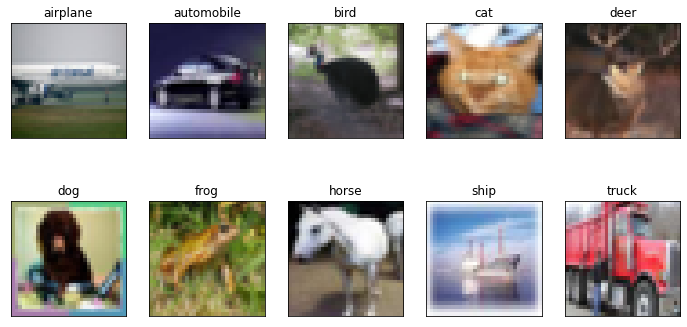

In [4]:
ClassNames = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

fig = plt.figure(figsize=(12,6)) # specifying size for each image.
for i in range(10):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(trainLabels[:]==i)[0]
    FeaturIndex = trainData[idx,::]
    ImageNumber = np.random.randint(FeaturIndex.shape[0])
    Image = (FeaturIndex[ImageNumber,::])
    ax.set_title(ClassNames[i])
    plt.imshow(Image)
plt.show()

##### **Normalizing the dataset**
Normalization is an important pre-processing steps before going into the actual classification because it will convert data into similar scale across the dataset. Before normalation here we are converting the type of the dataset to make it similar. 

In [5]:
trainData = trainData.astype('float32')
testData = testData.astype('float32')
trainData = trainData / 255.0
testData = testData / 255.0

##### **Configuring the GPU**
It is always a good option to use GPU for image classificaiton using CNN algorithm as the GPU has better computational power as comapre to CPU. Since we are using Google Colab so it has build in GPU which need to be turn on before using it. 

In [6]:
sess = tf.compat.v1.Session(config=tf.compat.v1.ConfigProto(log_device_placement=True))

Device mapping:
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5



Above message depicts that there is only one GPU which is running and the name of that GPU is 'Tesla T4'. The second line of larger length illustrates that the GPU is selected to perform task later on. 

In [7]:
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 17821726369887883359
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14415560704
locality {
  bus_id: 1
  links {
  }
}
incarnation: 4242133366129494049
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
xla_global_id: 416903419
]


The device_lib module tells us the available devices. 


## ResNet Model

Two different CNN models is used for the classification of the cifar 10 images. The two models are
1. ResNet
2. AlexNet

The ResNet is initialize with weights "imagnet". It means that the original weights are considered. In other words, weight is carried out as it was in original model. Now the first layer after that is input layers which takes the size of the image and our image size is 32x32x3. The last layer will be changed as we have 10 classes in total. The next step is to access the current last layer and add flatten and the dense layer to the model. After that the model is created with input and output layer. The last layer will only be set to be trained and then start training the model. 

In [8]:
from tensorflow.keras.applications import resnet50
from tensorflow.keras import models, layers

input_layer=layers.Input(shape=(32,32,3))
resnet_model=resnet50.ResNet50(weights='imagenet',input_tensor=input_layer,include_top=False)
last_layer=resnet_model.output # we are taking last layer of the model
flatten=layers.Flatten()(last_layer) 
output_layer=layers.Dense(10,activation='softmax')(flatten)
model=models.Model(inputs=input_layer,outputs=output_layer)
# only the last layer should be trainable.
for layer in model.layers[:-1]:
    layer.trainable=False
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

94765736/94765736 [==============================] - 1s 0us/step


In [9]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 38, 38, 3)    0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 16, 16, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 16, 16, 64)   256         ['conv1_conv[0][0]']             
                                                                                              

In [10]:
Time1 = timeit.default_timer()
with tf.device('/device:GPU:0'):
  output = model.fit(trainData,trainLabels,epochs=20,batch_size=64,verbose=True,validation_data=(testData,testLabels))
Time2 = timeit.default_timer()

Epoch 1/20
782/782 [==============================] - 25s 20ms/step - loss: 2.1247 - accuracy: 0.2295 - val_loss: 1.9540 - val_accuracy: 0.3024
Epoch 2/20
782/782 [==============================] - 12s 15ms/step - loss: 1.9459 - accuracy: 0.2991 - val_loss: 1.9455 - val_accuracy: 0.2810
Epoch 3/20
782/782 [==============================] - 12s 15ms/step - loss: 1.8889 - accuracy: 0.3243 - val_loss: 1.8509 - val_accuracy: 0.3489
Epoch 4/20
782/782 [==============================] - 12s 15ms/step - loss: 1.8504 - accuracy: 0.3394 - val_loss: 1.7989 - val_accuracy: 0.3738
Epoch 5/20
782/782 [==============================] - 12s 15ms/step - loss: 1.8258 - accuracy: 0.3523 - val_loss: 1.8356 - val_accuracy: 0.3415
Epoch 6/20
782/782 [==============================] - 13s 16ms/step - loss: 1.8020 - accuracy: 0.3596 - val_loss: 1.8125 - val_accuracy: 0.3482
Epoch 7/20
782/782 [==============================] - 12s 16ms/step - loss: 1.7860 - accuracy: 0.3643 - val_loss: 1.7776 - val_accuracy:

In [11]:
print('The time taken for ResNet Model to train (s):', round(Time2 - Time1, 4))

The time taken for ResNet Model to train (s): 258.7014


### Testing ResNet Model

In [12]:
ResNetPredict = model.predict(testData)
ResNetPredict.reshape(-1,)
ResNetPredict = np.argmax(ResNetPredict, axis=1)

313/313 [==============================] - 4s 9ms/step


In [13]:
print("Test accuracy of ResNet model:", accuracy_score(testLabels, ResNetPredict))

Test accuracy of ResNet model: 0.4046


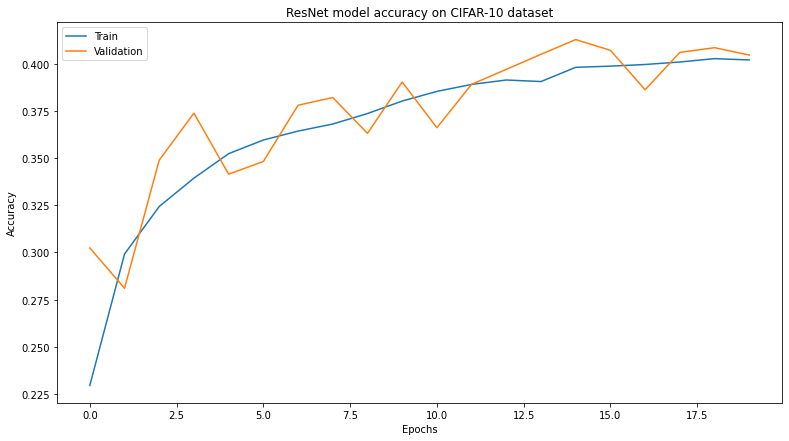

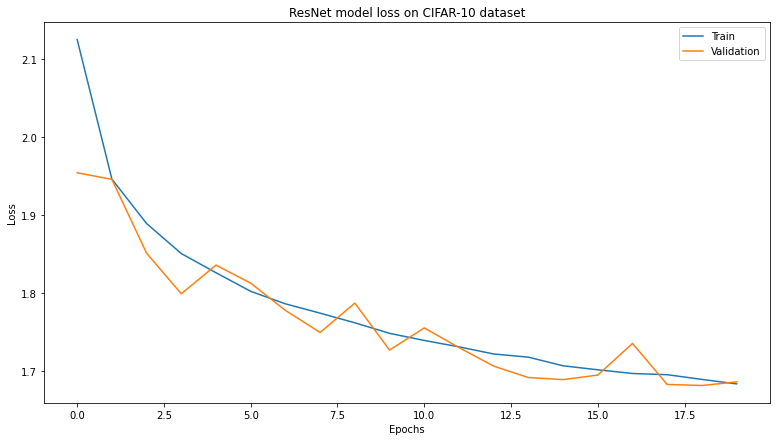

In [14]:
# summarize history for accuracy
accuracies = output.history['accuracy']
valAccuracies = output.history['val_accuracy']

plt.figure(figsize = (13,7))
plt.plot(accuracies)
plt.plot(valAccuracies)
plt.title("ResNet model accuracy on CIFAR-10 dataset")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# summarize history for loss
loss = output.history['loss']
valLoss = output.history['val_loss']

plt.figure(figsize = (13,7))
plt.plot(loss)
plt.plot(valLoss)
plt.title('ResNet model loss on CIFAR-10 dataset')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
plt.show()

The first graph depicts the validation and training accuracy for multiple epochs. It is clear from the figure above that training accuracy is continously increasing while the validation accuracy has quite different increasing behavior. The accuracies might have reached to a higher value and this behavior might be changed if we have used a higher number of epochs.

The second graph in the figure above illustrates the loss of training and validation. It is clear from the figure above that by increasing the number of epochs the loss is decreased. It means the model is training better. Morover, the validation loss is seen to be decreasing steadily with the training loss, so this shows that the data is being trained better and there are no generalizations while training the model.

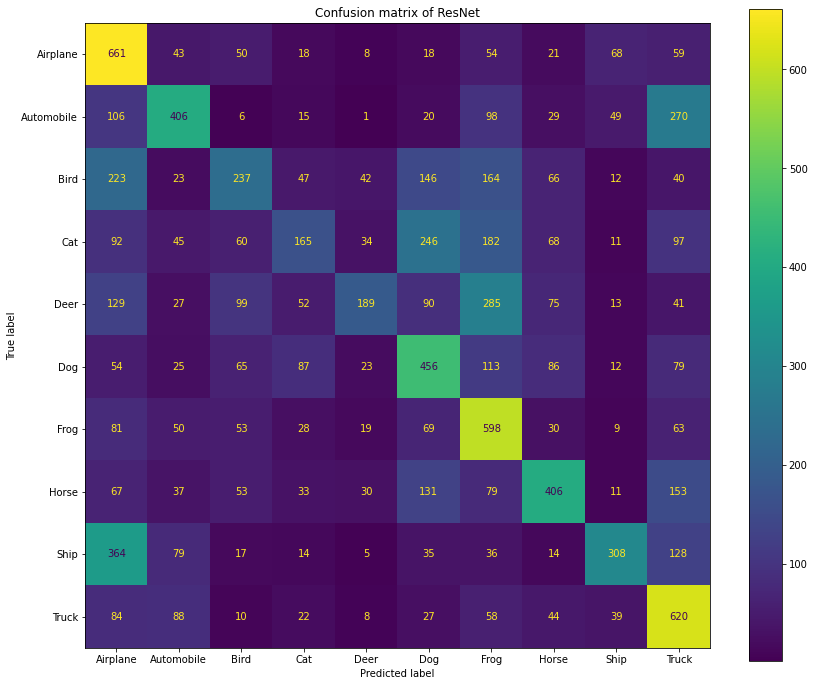

In [15]:
classes = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
fig, ax = plt.subplots(figsize=(14,12))
plt.title('Confusion matrix of ResNet', fontsize=12)
cm = confusion_matrix(testLabels, ResNetPredict)
ConfuMatrix = ConfusionMatrixDisplay(cm, display_labels=classes)
ConfuMatrix.plot(values_format='d', ax = ax)
plt.show()

The confusion matrix depicts that predicted and true value labels for the cifar-10 images. The entries in the diagonal illustrates the true prediction predicted by the trained model. 

## AlexNet Model

In AlexNet model, there are multiple convolution and pooling layers as compare to other CNN models. In this model, max pooling layers is used just becuase of its differece architecture. Two other parameters including strides and window size can be used to move the window. 
In all these layers used in AlexNet model, the "Conv2D" is used in convolutional layer and it has few parameters including strides, activation, input shape, padding, kernel_size. Conv2D is the number of output filters in convolution. On the other hand, the kernel_size refer to the convolutional window size that can move throughout the image while training. The other parameter is activation which is used to mentioned the activation function for each layer. In our case, the relu activation is used for intermediate layer while for the output layer, softmax is used. The padding in our case is 'same' or sometime 'valid. 

The flatten array just convert the ouptut from convolution layer to 1 dimensional array. 
In the final ouput the number 10 is used which is number of classes. 

In [16]:
AlexNet_Model = Sequential()
AlexNet_Model.add(Conv2D(16, kernel_size = (3,3), strides = (4,4), activation = 'relu', input_shape = (32, 32, 3)))
AlexNet_Model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
AlexNet_Model.add(Conv2D(60, kernel_size = (5,5), activation = 'relu', padding = 'same'))
AlexNet_Model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
AlexNet_Model.add(Conv2D(60, kernel_size = (3,3), activation = 'relu', padding = 'same'))
AlexNet_Model.add(Conv2D(30, kernel_size = (3,3), activation = 'relu', padding = 'same'))
AlexNet_Model.add(Conv2D(20, kernel_size = (3,3), activation = 'relu', padding = 'same'))
AlexNet_Model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
# using flatten to convert the output layer to 1 dim array. 
AlexNet_Model.add(Flatten())
AlexNet_Model.add(Dense(200, activation = 'relu'))
AlexNet_Model.add(Dropout(0.1))
AlexNet_Model.add(Dense(200, activation = 'relu'))
AlexNet_Model.add(Dropout(0.1))
NumOfClasses = 10
AlexNet_Model.add(Dense(NumOfClasses, activation = 'softmax')) # Output Layer

In [17]:
AlexNet_Model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 8, 8, 16)          448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 4, 4, 16)         0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 4, 4, 60)          24060     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 2, 2, 60)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 2, 2, 60)          32460     
                                                                 
 conv2d_3 (Conv2D)           (None, 2, 2, 30)          1

In [18]:
AlexNet_Model.compile(optimizer = 'SGD', loss=keras.losses.sparse_categorical_crossentropy, metrics = ['accuracy'])

Here we train the AlexNet model

In [19]:
Time1 = timeit.default_timer()
with tf.device('/device:GPU:0'):
  hist_alexNet = AlexNet_Model.fit(trainData, trainLabels, epochs = 35, validation_data = (testData, testLabels), verbose = 1)
Time2 = timeit.default_timer()

Epoch 1/35
1563/1563 [==============================] - 10s 5ms/step - loss: 2.3000 - accuracy: 0.1255 - val_loss: 2.2938 - val_accuracy: 0.1726
Epoch 2/35
1563/1563 [==============================] - 8s 5ms/step - loss: 2.2366 - accuracy: 0.1722 - val_loss: 2.1100 - val_accuracy: 0.1799
Epoch 3/35
1563/1563 [==============================] - 8s 5ms/step - loss: 2.0614 - accuracy: 0.1947 - val_loss: 2.0025 - val_accuracy: 0.2139
Epoch 4/35
1563/1563 [==============================] - 8s 5ms/step - loss: 1.9837 - accuracy: 0.2142 - val_loss: 1.9161 - val_accuracy: 0.2468
Epoch 5/35
1563/1563 [==============================] - 8s 5ms/step - loss: 1.9001 - accuracy: 0.2495 - val_loss: 1.7903 - val_accuracy: 0.3075
Epoch 6/35
1563/1563 [==============================] - 8s 5ms/step - loss: 1.7689 - accuracy: 0.3128 - val_loss: 1.7077 - val_accuracy: 0.3309
Epoch 7/35
1563/1563 [==============================] - 8s 5ms/step - loss: 1.6802 - accuracy: 0.3549 - val_loss: 1.6435 - val_accuracy

In [20]:
print('Time taken for AlexNetModel to train (s):', round(Time2 - Time1, 4))

Time taken for AlexNetModel to train (s): 323.6359


The training accuracy of AlexNet model is 0.6943 at the final epoch, and the time it took to train is around 323 seconds which is very high than the ResNet model training. The accuracy might be increased by increasing the number of epochs but that could be verified by when we see the training curve in the next part of the notebook.

### Testing AlexNet Algorithms

In [21]:
alexNetPreds = AlexNet_Model.predict(testData)
alexNetPreds.reshape(-1,)
alexNetPreds = np.argmax(alexNetPreds, axis=1)

313/313 [==============================] - 1s 2ms/step


In [22]:
print("Test accuracy of AlexNet model:", accuracy_score(testLabels, alexNetPreds))

Test accuracy of AlexNet model: 0.5612


Here the test accuracy of AlexNet model is reported and it is 0.5608 percent. 
The reulst would have been different if we do some further cleaning or pre-processing to make it more better for training. The parameter might have positive affect on the accuracy of the model. 


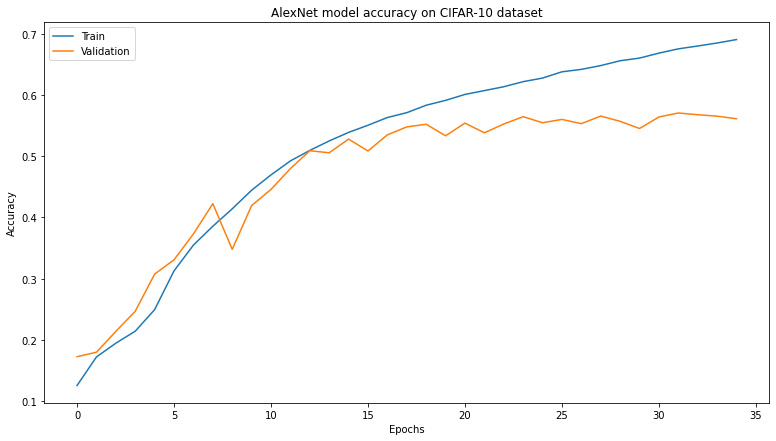

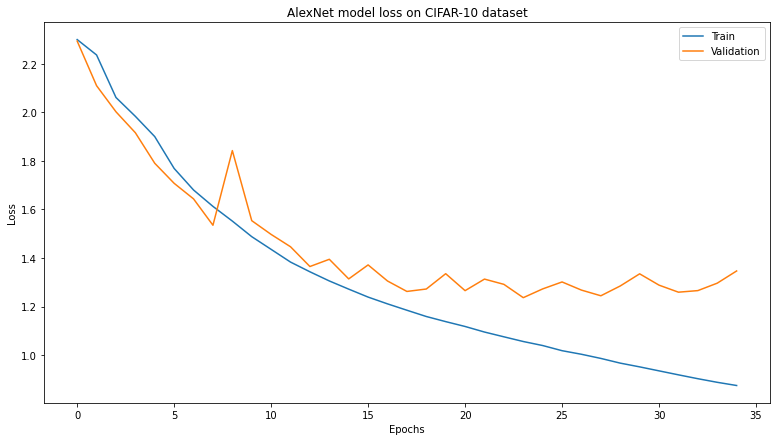

In [23]:
# summarize history for accuracy
accuracies = hist_alexNet.history['accuracy']
valAccuracies = hist_alexNet.history['val_accuracy']

plt.figure(figsize = (13,7))
plt.plot(accuracies)
plt.plot(valAccuracies)
plt.title("AlexNet model accuracy on CIFAR-10 dataset")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# summarize history for loss
loss = hist_alexNet.history['loss']
valLoss = hist_alexNet.history['val_loss']

plt.figure(figsize = (13,7))
plt.plot(loss)
plt.plot(valLoss)
plt.title('AlexNet model loss on CIFAR-10 dataset')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
plt.show()

These graphs are quite similar to the one we plot for the ResNet model. Curve is different for both algorithm. The upper graph depicts the model accuracy of AlexNet on cifar10 dataset. Almost in both training and validation case, the accuray is increased with number of epoch. In the end the training accuracy is increase a littel faster than the validation one. Similarly, the lower graph of the figure above shows the Loss of AlexNet model. Similar to the ResNet model the loss is also decreased with epochs. 


Furthermore, the behavious of the both in difference loss is quite different from each other. In ResNet model, the validatoin loss shows quite increasing and decreasing behavior while here in AlexNet model it is almost decreasing. 


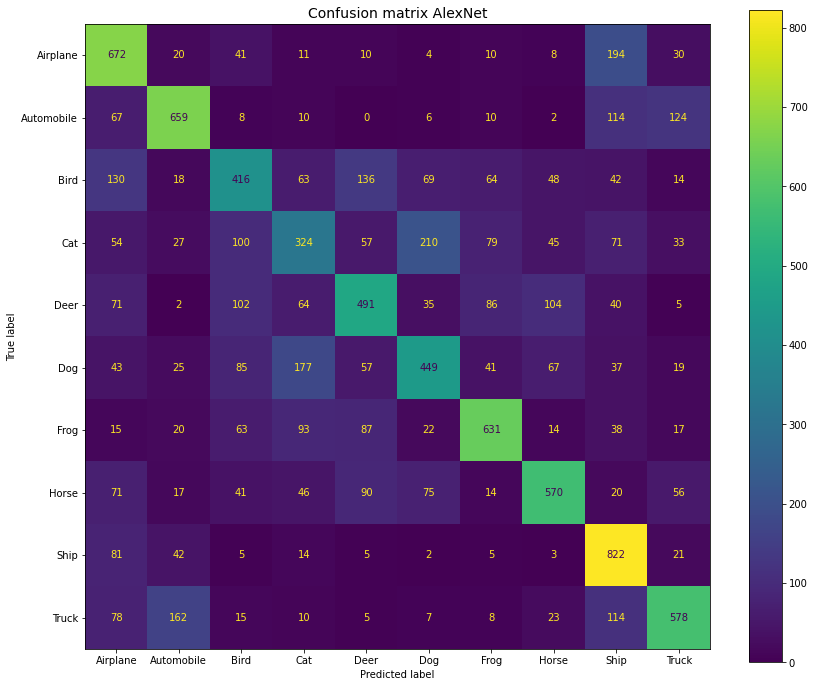

In [24]:
classes = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
fig, ax = plt.subplots(figsize=(14,12))
plt.title('Confusion matrix AlexNet', fontsize=14)
ConfusionMatrix = confusion_matrix(testLabels, alexNetPreds)
CM = ConfusionMatrixDisplay(ConfusionMatrix, display_labels=classes)
CM.plot(values_format='d', ax = ax)
plt.show()

This figure is the confusion matrix for AlexNet model and it depicts the true and the predicted labels for cifar-10 images. The diogonal entries shows the way true predictions has been predicted using the AlexNet model. 

## **Conclusion**
In this notebook, two different CNN models (ResNet and AlexNet) have been used to train on cifar-10 dataset. Both these model have been used in the literature for classification of images. On different images and with different parameter it could have different accuracies. The training and testing accuracies is alsmost same and it is 0.4015 which means it is around 40%. On the other hand the training accuracy of AlexNet is 0.6783 while the testing accuracy of this model is 0.5608. Overall the AlexNet perform better than the ResNet for cifar-10 classification. The time taken in training for ResNet model is 258 second while time takne by training AlexNet model is 323 seconds. AlexNet model takes more time due to its complex architecture. Furthermore, for different number of epochs the loss seems decreased when the number of epochs increases. The accuracy can be further increasing by using different parameters or maybe different combination of layers and epochs. 
